In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [50]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import IPython as ip
import os
from IPython.core.interactiveshell import InteractiveShell
import warnings

In [3]:
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
colors = sns.color_palette('tab10')


# Explore Data

In [4]:
# Read data into DataFrame
df = pd.read_csv("/kaggle/input/music-genre/test (2).csv")

In [5]:
df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

It looks like we have missing values in 3 features 

In [7]:
df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,16196.500000,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,1039.374812,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,14397.000000,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,15296.750000,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,16196.500000,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,17096.250000,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,17996.000000,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


In [8]:
# Display df columns
df.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature'],
      dtype='object')

In [9]:
# Null Values 
df.isna().sum()
# we will deal with null values later

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [10]:
df.nunique()

Id                    3600
Artist Name           2784
Track Name            3472
Popularity              95
danceability           758
energy                 890
key                     11
loudness              3010
mode                     2
speechiness            939
acousticness          2050
instrumentalness      1940
liveness               951
valence                995
tempo                 3353
duration_in min/ms    3380
time_signature           4
dtype: int64

# Deal with null values


<Figure size 1400x1000 with 0 Axes>

<Axes: >

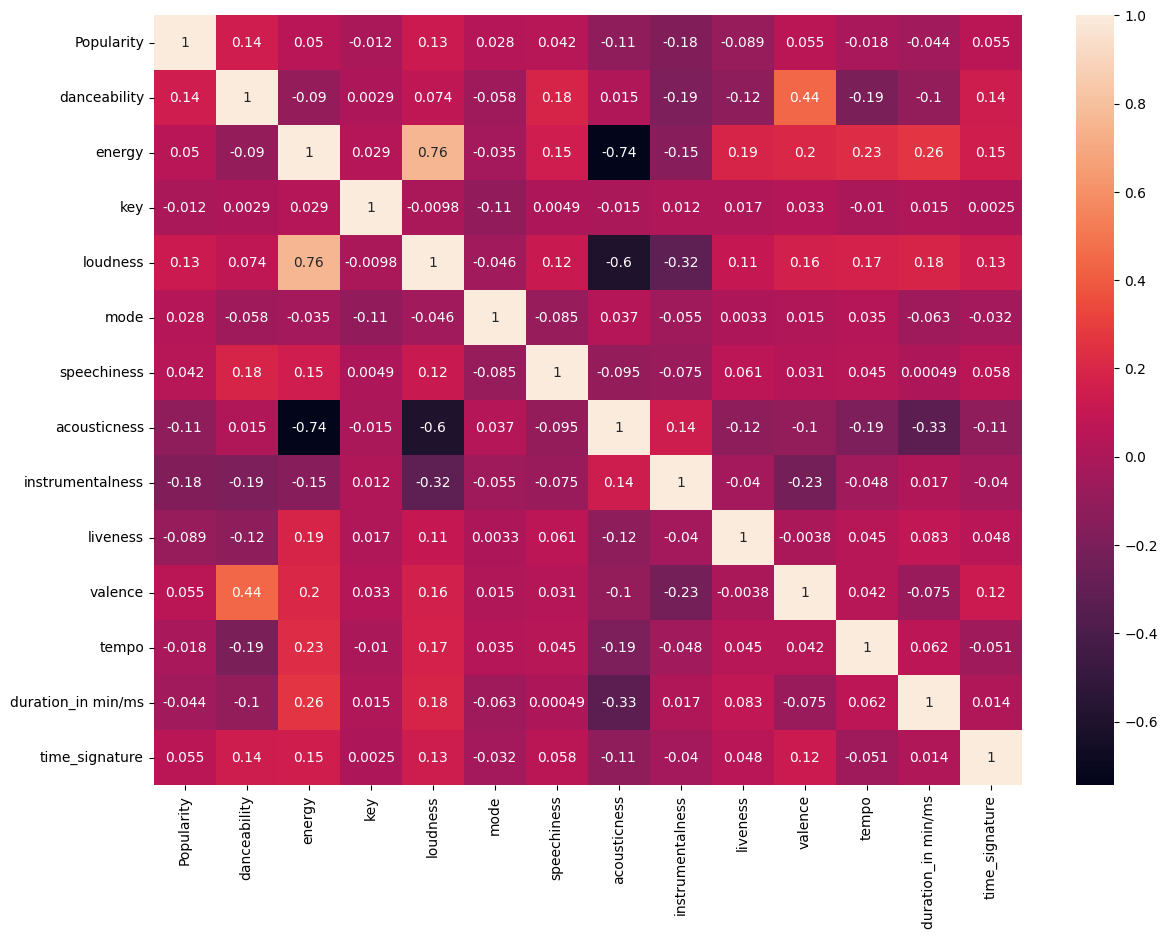

In [21]:
# Visualize Coorelation between features first to see which
#to impute and which to remove due to high collinearity
plt.figure(figsize=(14,10))
sns.heatmap(df.drop(columns='Id').corr(numeric_only=True), annot=True);
plt.show()

No null-value is high collinear with another features. hence,imputation is used.

# Data Visualization

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_in min/ms'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

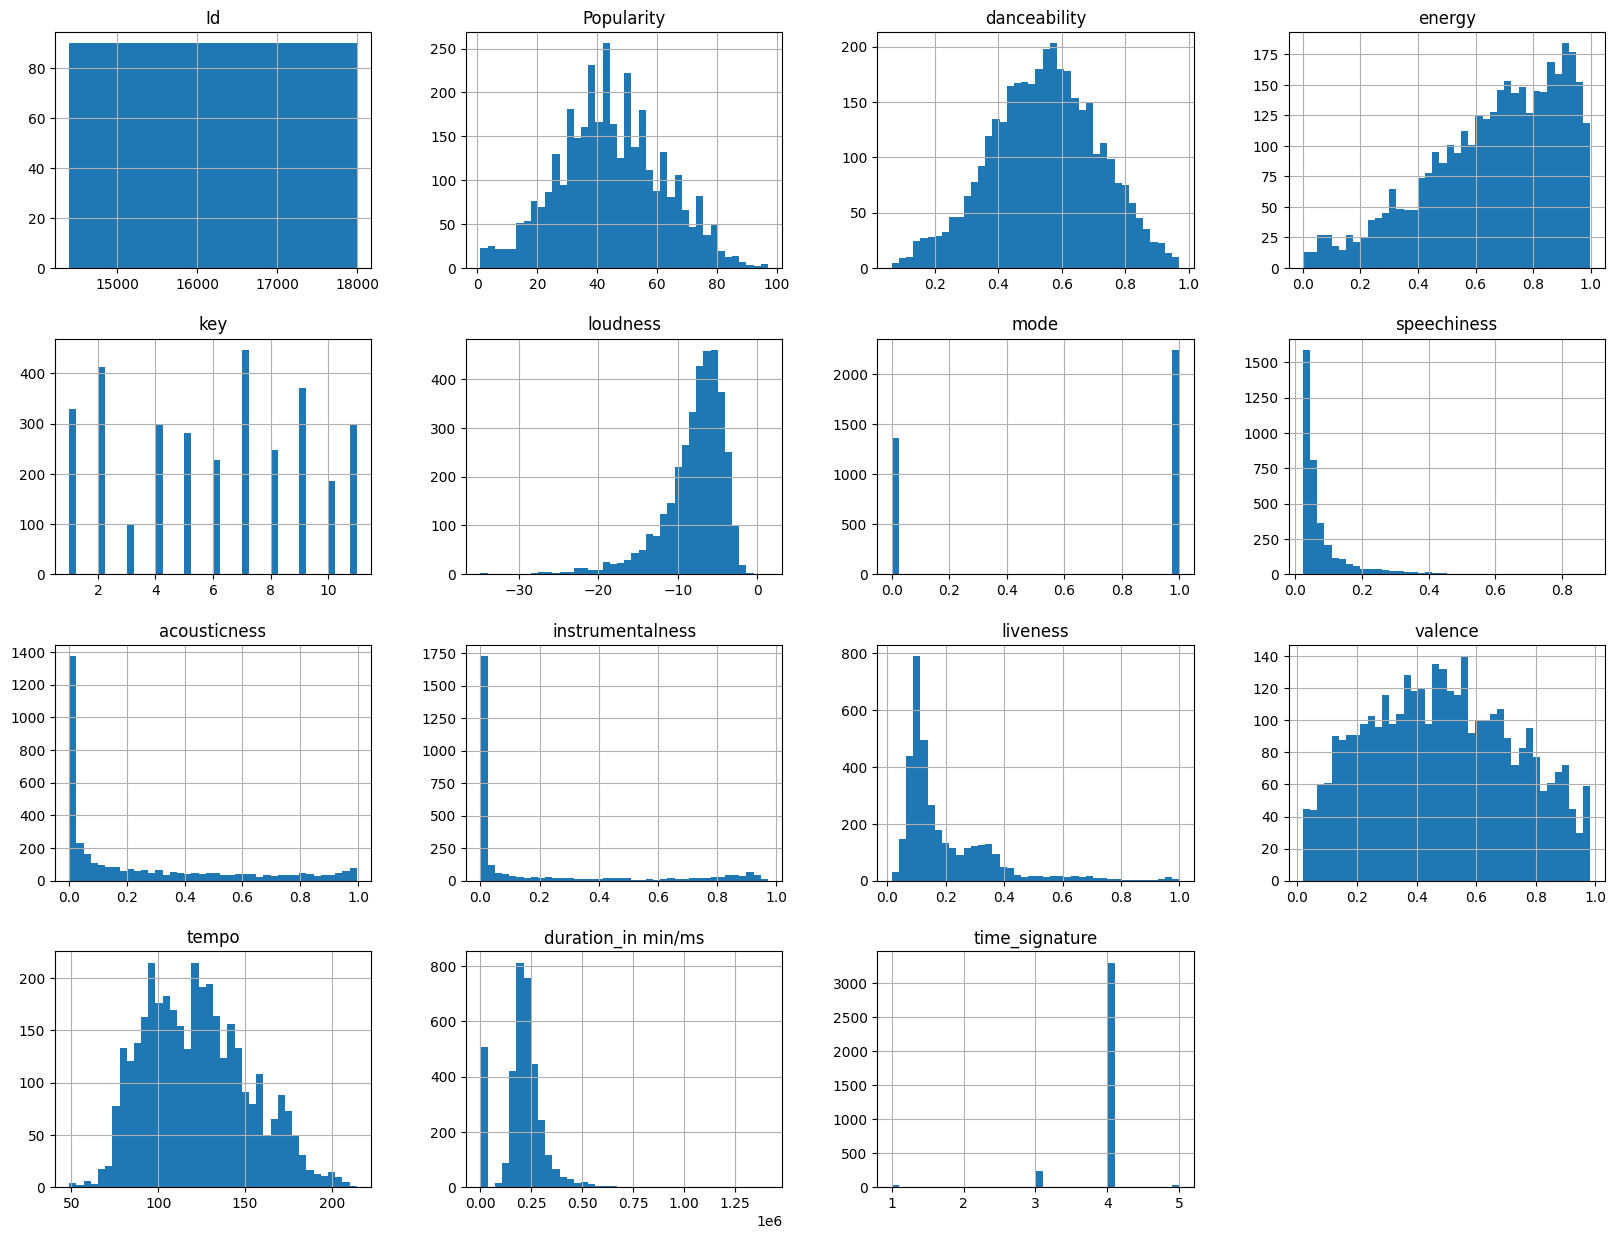

In [12]:
df.hist(bins = 40, figsize = (20,15));
plt.show()

In [ ]:
# Scatter matrix: Pairwise relationships between numerical features
numerical_features = ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                      'duration_in min/ms']

fig = px.scatter_matrix(df, dimensions=numerical_features, color='Artist Name',
                        labels={'Popularity':'Popularity', 'danceability':'Danceability',
                                'energy':'Energy', 'loudness':'Loudness', 'speechiness':'Speechiness',
                                'acousticness':'Acousticness', 'instrumentalness':'Instrumentalness',
                                'liveness':'Liveness', 'valence':'Valence', 'tempo':'Tempo',
                                'duration_in min/ms':'Duration (min/ms)'})

# Adding a title
fig.update_layout(title='Pairwise Relationships Between Numerical Features')



<Figure size 1600x1000 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'danceability')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'energy')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'key')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'loudness')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'mode')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'speechiness')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'acousticness')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'instrumentalness')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'liveness')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'valence')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'tempo')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'duration_in min/ms')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'time_signature')

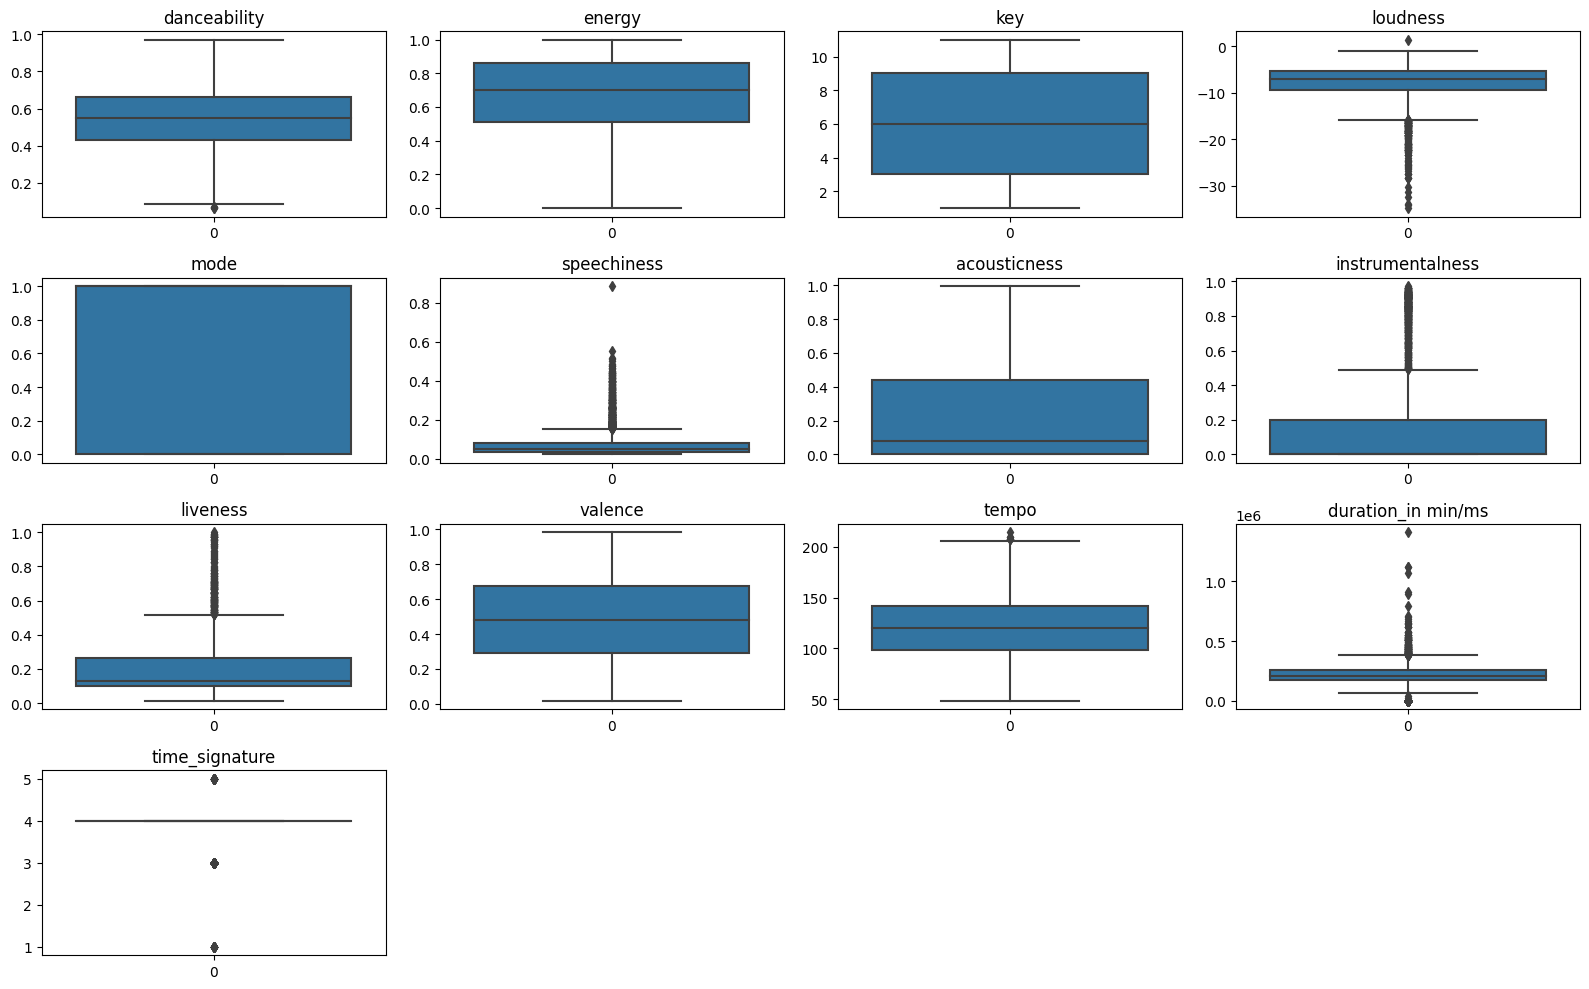

In [13]:
# Select relevant features for visualization
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_in min/ms', 'time_signature']
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Create a boxplot for each feature
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Adjust the layout as needed
    sns.boxplot(df[feature])
    plt.title(feature);

# Adjust layout
plt.tight_layout();
plt.show()



In [14]:
fig = px.scatter(df, x='danceability', y='Popularity', color='Artist Name',
                 title='Popularity vs Danceability Colored by Artist Name',
                 labels={'danceability':'Danceability', 'Popularity':'Popularity'})
fig.update_layout(title="Popularity vs Danceability colored by Artist Name")



In [15]:
# Box plot: Popularity by Mode
fig = px.box(df, x='mode', y='Popularity',
             labels={'mode':'Mode', 'Popularity':'Popularity'})

# Adding a title
fig.update_layout(title='Popularity by Mode')



# Train Model

In [39]:
X = df.drop(columns ='Id', axis=1)

In [23]:
print("Trainig set size:", X.shape)

Trainig set size: (3600, 16)
